In [ ]:
# Установи библиотеки если нужно
# !pip install requests matplotlib torch transformers

🚀 Используется устройство: cuda
✅ CLIP модель загружена!

🔍 Анализ изображения 1...


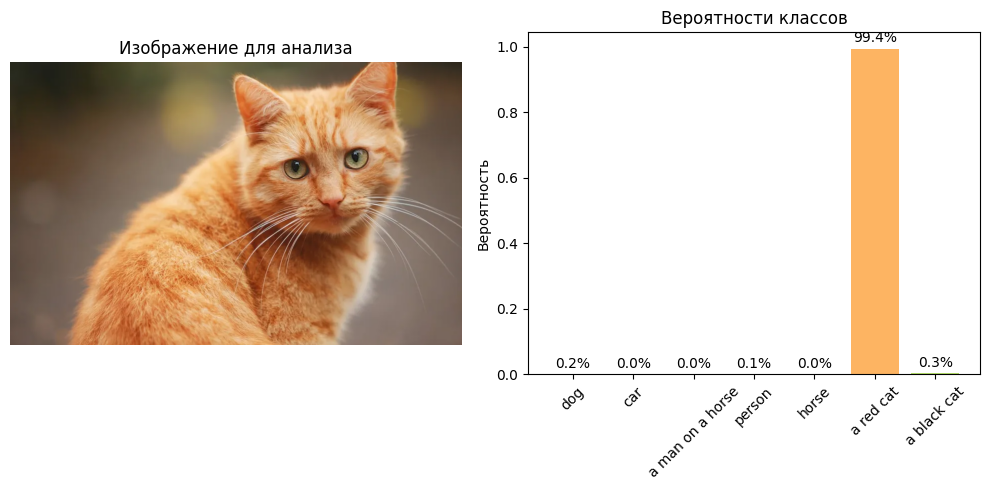

🎯 Результат: a red cat (уверенность: 99.39%)

🔍 Анализ изображения 2...


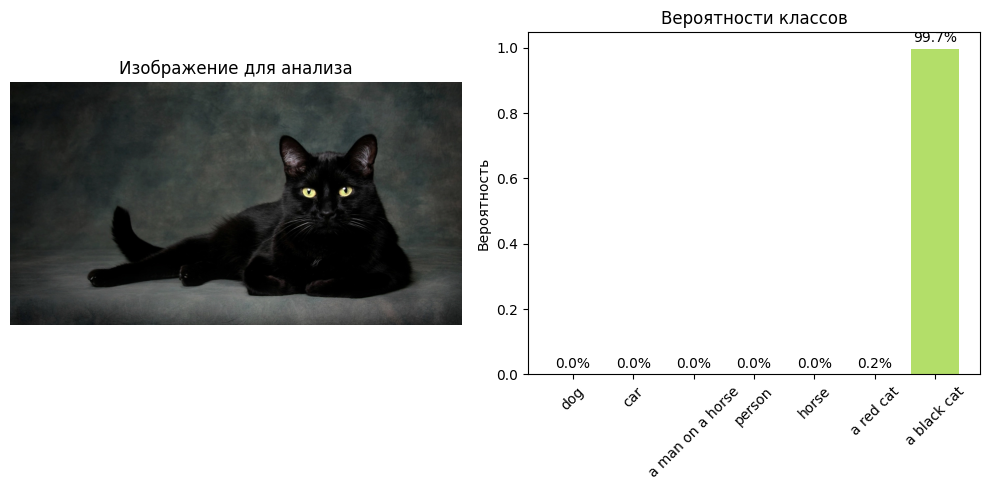

🎯 Результат: a black cat (уверенность: 99.74%)

🔍 Анализ изображения 3...


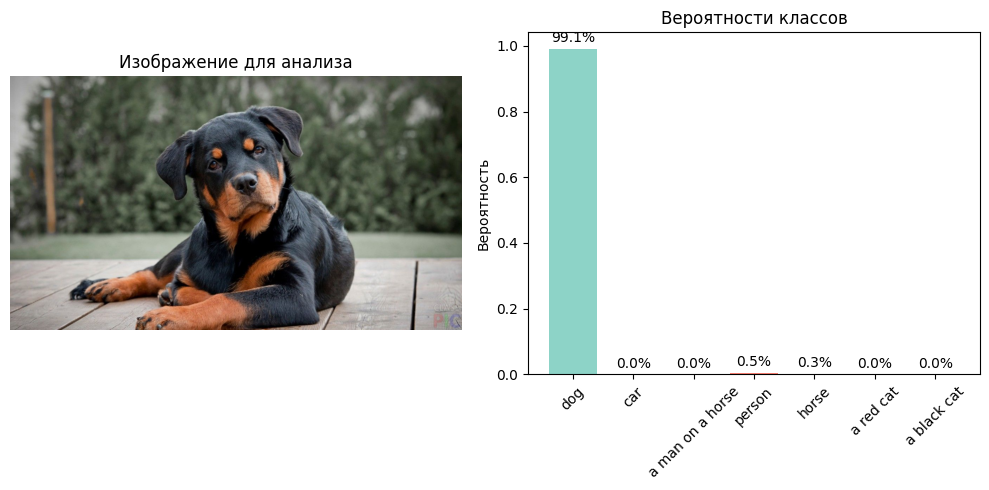

🎯 Результат: dog (уверенность: 99.14%)

🔍 Анализ изображения 4...


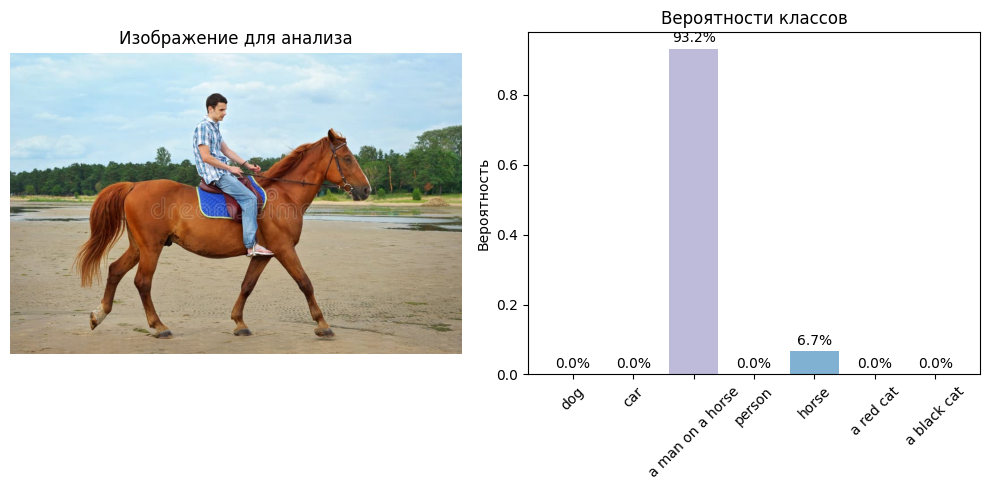

🎯 Результат: a man on a horse (уверенность: 93.25%)


In [23]:
import torch
from transformers import CLIPModel, CLIPProcessor
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

# Автоматически выбираем устройство
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"🚀 Используется устройство: {device}")

# Загружаем модель и процессор
model_name = "openai/clip-vit-base-patch32"
model = CLIPModel.from_pretrained(model_name).to(device)
processor = CLIPProcessor.from_pretrained(model_name)

print("✅ CLIP модель загружена!")

def classify_image_from_url(image_url, classes):
    """Классификация изображения по URL"""
    
    # Загружаем изображение из интернета
    response = requests.get(image_url)
    image = Image.open(BytesIO(response.content))
    
    # Подготавливаем текстовые описания классов
    text_descriptions = [f"a photo of a {cls}" for cls in classes]
    
    # Обрабатываем данные
    inputs = processor(text=text_descriptions, images=image, return_tensors="pt", padding=True)
    inputs = {k: v.to(device) for k, v in inputs.items()}
    
    # Получаем предсказания
    with torch.no_grad():
        outputs = model(**inputs)
    
    logits_per_image = outputs.logits_per_image
    probs = logits_per_image.softmax(dim=1)[0]
    
    # Выводим результаты
    plt.figure(figsize=(10, 5))
    
    # Показываем изображение
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.axis('off')
    plt.title("Изображение для анализа")
    
    # Показываем вероятности
    plt.subplot(1, 2, 2)
    colors = plt.cm.Set3(range(len(classes)))
    bars = plt.bar(range(len(classes)), probs.cpu().numpy(), color=colors)
    plt.xticks(range(len(classes)), classes, rotation=45)
    plt.title("Вероятности классов")
    plt.ylabel("Вероятность")
    
    # Добавляем значения на столбцы
    for bar, prob in zip(bars, probs):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                f'{prob:.1%}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    # Возвращаем лучший класс
    best_idx = probs.argmax().item()
    return classes[best_idx], probs[best_idx].item()

# 🎯 ТЕСТИРУЕМ!
test_urls = [
    "https://wallpapers.com/images/high/cat-pictures-zc3gu0636kmldm04.webp", # Рыжий кот
    "https://www.letribunaldunet.fr/wp-content/uploads/2020/11/superstitions-chat-noir.jpg.webp",  # черный кот
    "https://i.pinimg.com/originals/c0/03/44/c003441c63f20a2af76620d157c20ec8.jpg",  # собака
    "https://thumbs.dreamstime.com/b/hombre-que-monta-un-caballo-20682553.jpg",  # человек на лошади
    # "",  # машина
]

#classes = ["cat", "dog", "car", "tree", "person", "building", "a red cat"]
classes = ["dog", "car", "a man on a horse", "person", "horse", "a red cat", "a black cat"]
#classes = ["собака", "car", "a man on a horse", "person", "horse", "a red cat", "черный кот"] # русский не понимает

# for i, url in enumerate(test_urls[:1]):  # протестируем первую
#     print(f"\n🔍 Анализ изображения {i+1}...")
#     best_class, confidence = classify_image_from_url(url, classes)
#     print(f"🎯 Результат: {best_class} (уверенность: {confidence:.2%})")

# ИСПРАВЛЕННАЯ СТРОКА - убрали [:1]
for i, url in enumerate(test_urls):  # теперь протестируем все
    print(f"\n🔍 Анализ изображения {i+1}...")
    best_class, confidence = classify_image_from_url(url, classes)
    print(f"🎯 Результат: {best_class} (уверенность: {confidence:.2%})")    

🚀 Используется устройство: cuda
✅ CLIP модель загружена!
📁 РЕЖИМ: АНАЛИЗ ВСЕЙ ПАПКИ
📂 Папка для изображений: /home/oleg/projects/ML/CLIP/images
💡 Положите ваши изображения в эту папку и запустите программу
📁 Найдено 8 изображений в папке CLIP/images

🔍 Анализ изображения: 3c237a92b724ac939f84493963c00952.jpg
📁 Загружено изображение: 3c237a92b724ac939f84493963c00952.jpg


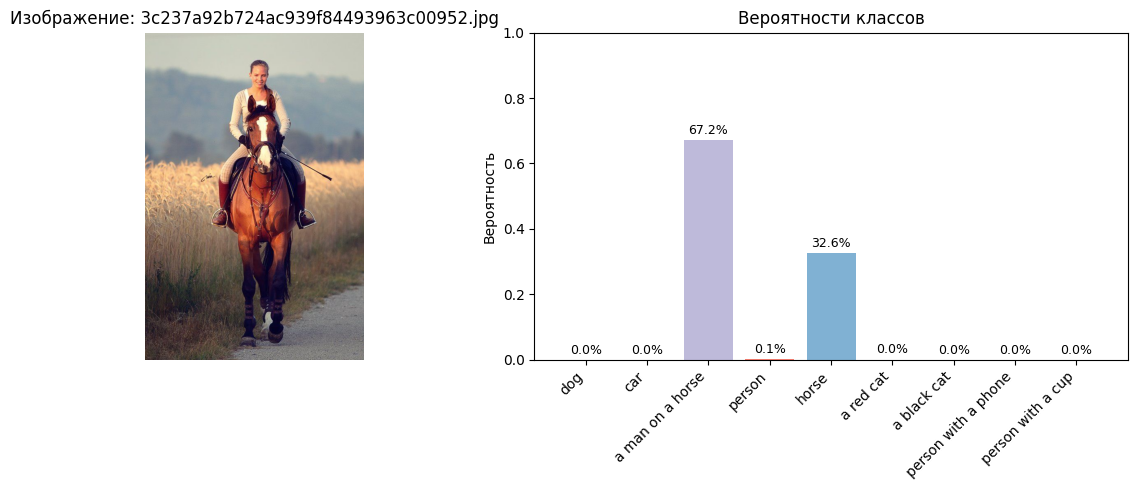

🎯 Результат: a man on a horse (уверенность: 67.15%)

🔍 Анализ изображения: gettyimages-524401415-1024x1024.jpg
📁 Загружено изображение: gettyimages-524401415-1024x1024.jpg


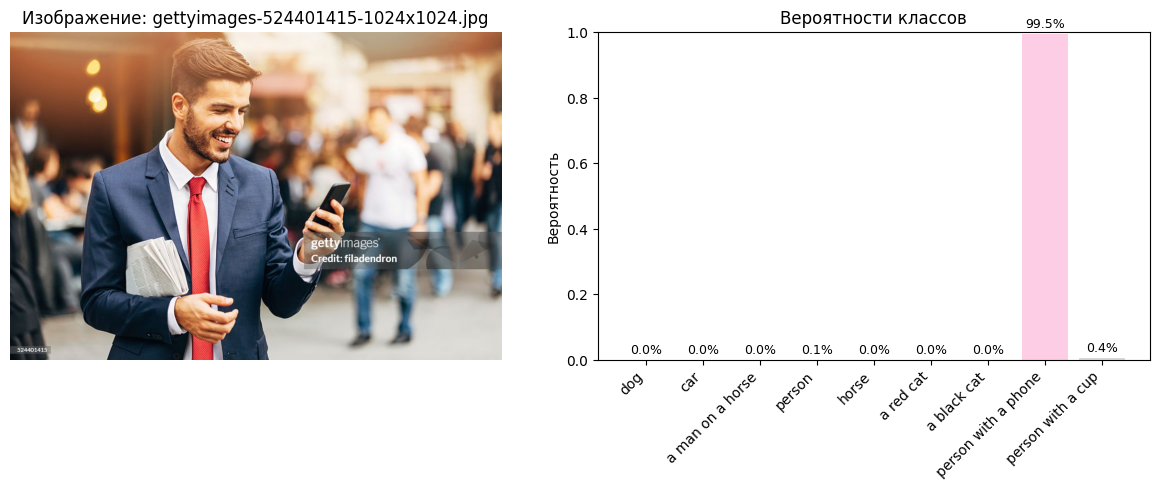

🎯 Результат: person with a phone (уверенность: 99.46%)

🔍 Анализ изображения: 05a992e228da2abf2d571db367a3febf.jpg
📁 Загружено изображение: 05a992e228da2abf2d571db367a3febf.jpg


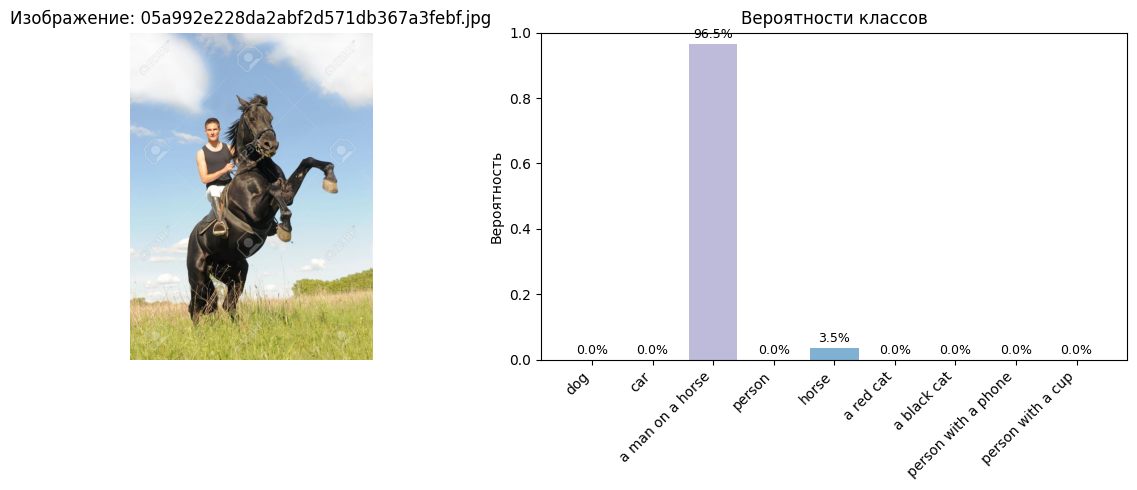

🎯 Результат: a man on a horse (уверенность: 96.50%)

🔍 Анализ изображения: elegant-portrait-black-cat-indoors_23-2151890796.jpg
📁 Загружено изображение: elegant-portrait-black-cat-indoors_23-2151890796.jpg


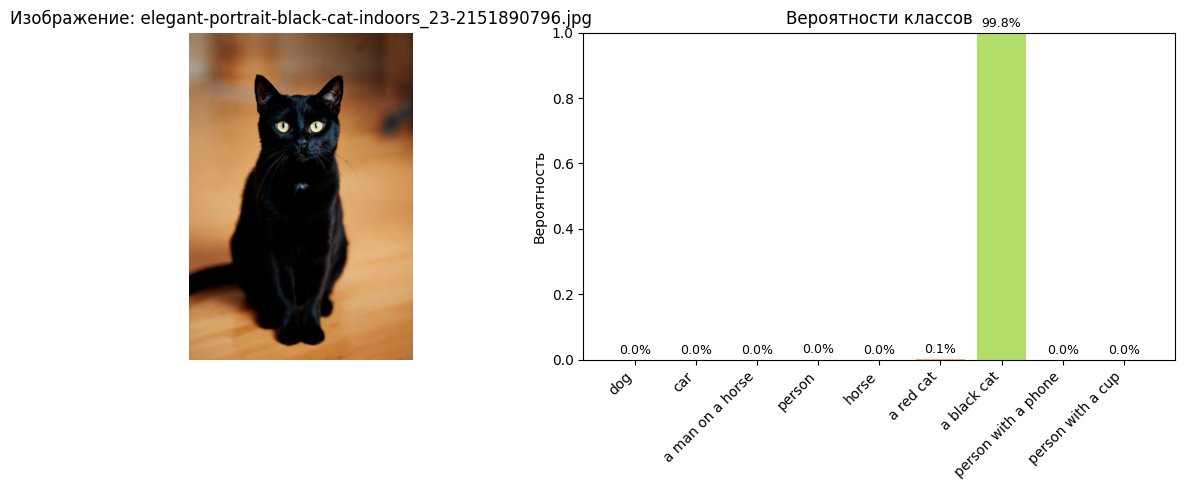

🎯 Результат: a black cat (уверенность: 99.80%)

🔍 Анализ изображения: cat-pictures-zc3gu0636kmldm04.jpg
📁 Загружено изображение: cat-pictures-zc3gu0636kmldm04.jpg


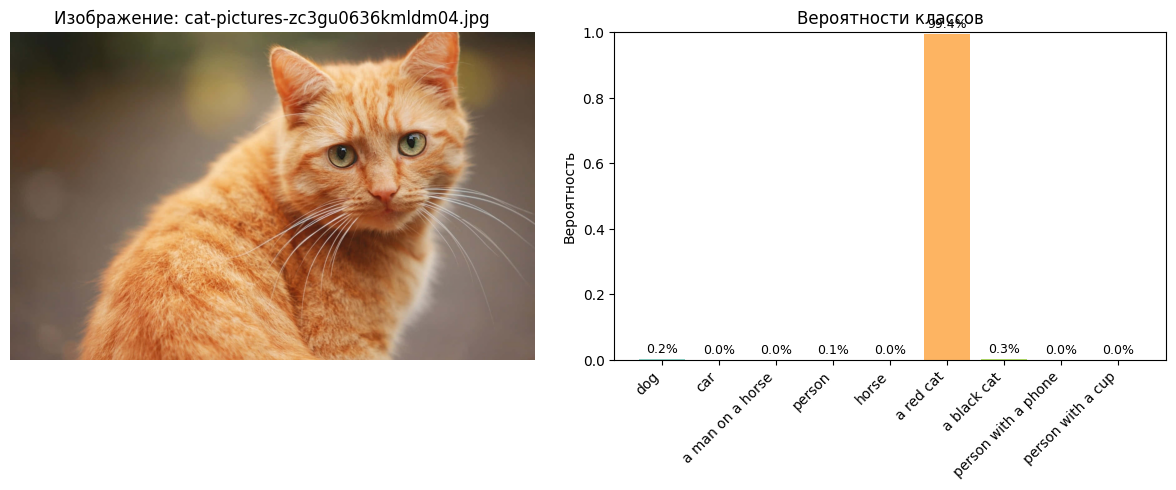

🎯 Результат: a red cat (уверенность: 99.40%)

🔍 Анализ изображения: 409052_size1.jpg
📁 Загружено изображение: 409052_size1.jpg


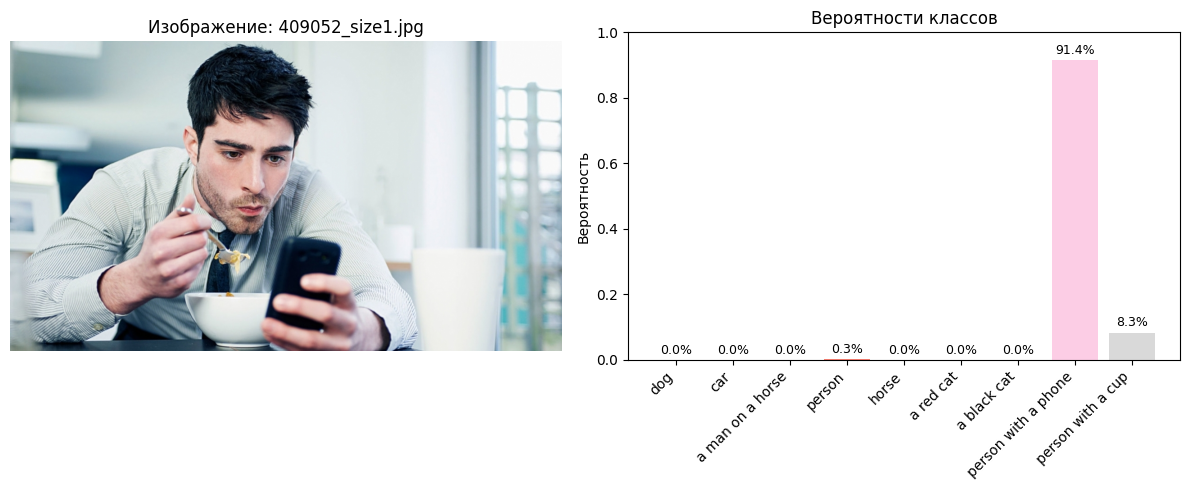

🎯 Результат: person with a phone (уверенность: 91.44%)

🔍 Анализ изображения: 1e64d77677f5ce8714d552f30f2422bb.jpg
📁 Загружено изображение: 1e64d77677f5ce8714d552f30f2422bb.jpg


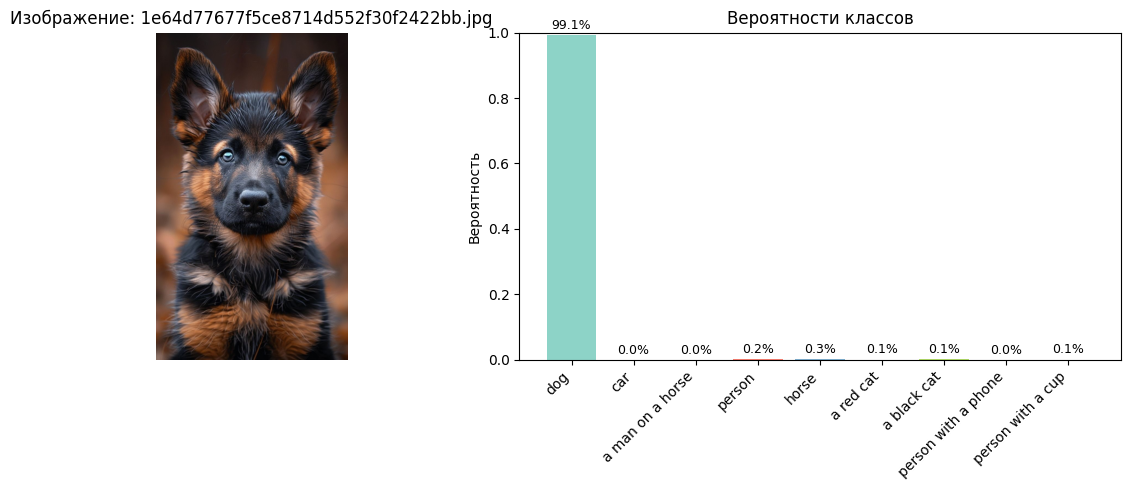

🎯 Результат: dog (уверенность: 99.12%)

🔍 Анализ изображения: 0d354ad89e92986b19b10a8ac2797dfb.jpg
📁 Загружено изображение: 0d354ad89e92986b19b10a8ac2797dfb.jpg


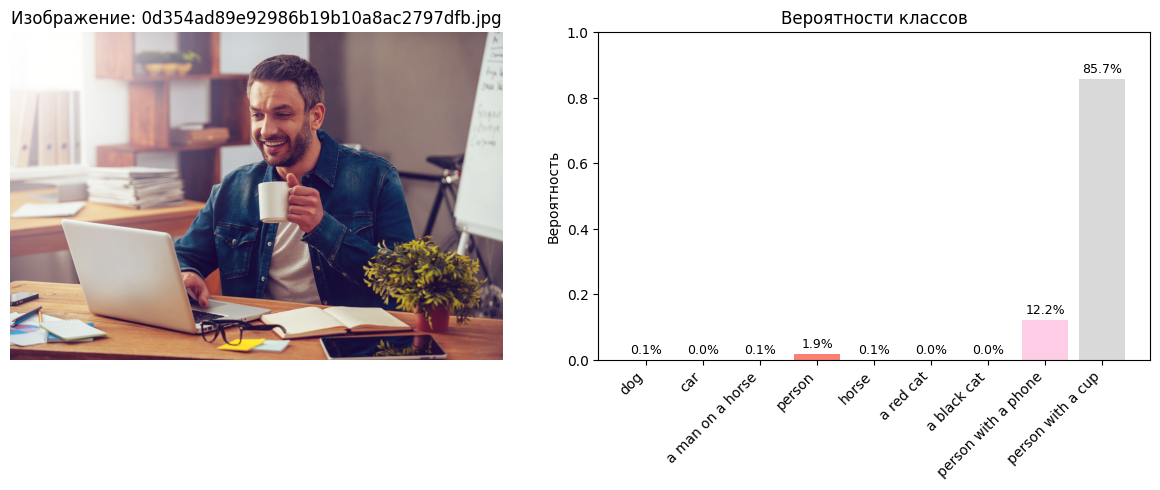

🎯 Результат: person with a cup (уверенность: 85.70%)

📊 ИТОГОВЫЕ РЕЗУЛЬТАТЫ:
📄 3c237a92b724ac939f84493963c00952.jpg: a man on a horse (67.15%)
📄 gettyimages-524401415-1024x1024.jpg: person with a phone (99.46%)
📄 05a992e228da2abf2d571db367a3febf.jpg: a man on a horse (96.50%)
📄 elegant-portrait-black-cat-indoors_23-2151890796.jpg: a black cat (99.80%)
📄 cat-pictures-zc3gu0636kmldm04.jpg: a red cat (99.40%)
📄 409052_size1.jpg: person with a phone (91.44%)
📄 1e64d77677f5ce8714d552f30f2422bb.jpg: dog (99.12%)
📄 0d354ad89e92986b19b10a8ac2797dfb.jpg: person with a cup (85.70%)

✅ Программа завершена! Проверьте папку 'CLIP/images' для добавления изображений.


In [24]:
# Установи библиотеки если нужно
# !pip install requests matplotlib torch transformers

import torch
from transformers import CLIPModel, CLIPProcessor
from PIL import Image
import matplotlib.pyplot as plt
import os
from pathlib import Path

# Автоматически выбираем устройство
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"🚀 Используется устройство: {device}")

# Загружаем модель и процессор
model_name = "openai/clip-vit-base-patch32"
model = CLIPModel.from_pretrained(model_name).to(device)
processor = CLIPProcessor.from_pretrained(model_name)

print("✅ CLIP модель загружена!")

def classify_local_image(image_path, classes):
    """Классификация локального изображения"""
    
    # Загружаем изображение
    try:
        image = Image.open(image_path)
        print(f"📁 Загружено изображение: {os.path.basename(image_path)}")
    except Exception as e:
        print(f"❌ Ошибка загрузки изображения {image_path}: {e}")
        return None, None
    
    # Подготавливаем текстовые описания классов
    text_descriptions = [f"a photo of a {cls}" for cls in classes]
    
    # Обрабатываем данные
    inputs = processor(text=text_descriptions, images=image, return_tensors="pt", padding=True)
    inputs = {k: v.to(device) for k, v in inputs.items()}
    
    # Получаем предсказания
    with torch.no_grad():
        outputs = model(**inputs)
    
    logits_per_image = outputs.logits_per_image
    probs = logits_per_image.softmax(dim=1)[0]
    
    # Выводим результаты
    plt.figure(figsize=(12, 5))
    
    # Показываем изображение
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"Изображение: {os.path.basename(image_path)}")
    
    # Показываем вероятности
    plt.subplot(1, 2, 2)
    colors = plt.cm.Set3(range(len(classes)))
    bars = plt.bar(range(len(classes)), probs.cpu().numpy(), color=colors)
    plt.xticks(range(len(classes)), classes, rotation=45, ha='right')
    plt.title("Вероятности классов")
    plt.ylabel("Вероятность")
    plt.ylim(0, 1)
    
    # Добавляем значения на столбцы
    for bar, prob in zip(bars, probs):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                f'{prob:.1%}', ha='center', va='bottom', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    # Возвращаем лучший класс
    best_idx = probs.argmax().item()
    return classes[best_idx], probs[best_idx].item()

def classify_all_images_in_folder(folder_path, classes):
    """Классификация всех изображений в папке"""
    
    # Поддерживаемые форматы изображений
    supported_formats = {'.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.webp'}
    
    # Получаем все файлы из папки
    folder = Path(folder_path)
    if not folder.exists():
        print(f"❌ Папка {folder_path} не существует!")
        return
    
    image_files = [f for f in folder.iterdir() 
                  if f.is_file() and f.suffix.lower() in supported_formats]
    
    if not image_files:
        print(f"❌ В папке {folder_path} не найдено изображений!")
        return
    
    print(f"📁 Найдено {len(image_files)} изображений в папке {folder_path}")
    
    results = []
    for image_path in image_files:
        print(f"\n🔍 Анализ изображения: {image_path.name}")
        best_class, confidence = classify_local_image(image_path, classes)
        
        if best_class and confidence:
            result = {
                'filename': image_path.name,
                'best_class': best_class,
                'confidence': confidence
            }
            results.append(result)
            print(f"🎯 Результат: {best_class} (уверенность: {confidence:.2%})")
    
    return results

def classify_single_image(image_path, classes):
    """Классификация одного изображения"""
    print(f"\n🔍 Анализ изображения: {os.path.basename(image_path)}")
    best_class, confidence = classify_local_image(image_path, classes)
    
    if best_class and confidence:
        print(f"🎯 Результат: {best_class} (уверенность: {confidence:.2%})")
        return {'filename': os.path.basename(image_path), 'best_class': best_class, 'confidence': confidence}
    return None

# 🎯 ОСНОВНАЯ ПРОГРАММА

# Определяем классы для классификации
classes = ["dog", "car", "a man on a horse", "person", "horse", "a red cat", "a black cat", "person with a phone", "person with a cup"]

# Вариант 1: Анализ всей папки с изображениями
print("=" * 50)
print("📁 РЕЖИМ: АНАЛИЗ ВСЕЙ ПАПКИ")
print("=" * 50)

# Укажите путь к вашей папке с изображениями
images_folder = "CLIP/images"  # Замените на путь к вашей папке

# Создаем папку если её нет
os.makedirs(images_folder, exist_ok=True)
print(f"📂 Папка для изображений: {os.path.abspath(images_folder)}")
print("💡 Положите ваши изображения в эту папку и запустите программу")

# Анализируем все изображения в папке
results = classify_all_images_in_folder(images_folder, classes)

# Выводим итоговые результаты
if results:
    print("\n" + "=" * 50)
    print("📊 ИТОГОВЫЕ РЕЗУЛЬТАТЫ:")
    print("=" * 50)
    for result in results:
        print(f"📄 {result['filename']}: {result['best_class']} ({result['confidence']:.2%})")

# Вариант 2: Анализ конкретного файла (раскомментируйте если нужно)
"""
print("\n" + "=" * 50)
print("📄 РЕЖИМ: АНАЛИЗ КОНКРЕТНОГО ФАЙЛА")
print("=" * 50)

# Укажите полный путь к конкретному изображению
specific_image = "path/to/your/image.jpg"  # Замените на реальный путь
classify_single_image(specific_image, classes)
"""

print(f"\n✅ Программа завершена! Проверьте папку '{images_folder}' для добавления изображений.")

In [ ]:
Технические детали

Размеры моделей:

CLIP-ViT-B/32: 151M параметров
CLIP-ViT-B/16: 150M параметров
CLIP-ViT-L/14: 428M параметров
CLIP-RN50: 102M параметров

openai/clip-vit-base-patch32

Производительность:
python
# На различных датасетах
datasets_performance = {
    "ImageNet": "76.2% accuracy (zero-shot)",
    "CIFAR-10": "95.5% accuracy", 
    "CIFAR-100": "79.3% accuracy",
    "Oxford-IIIT Pets": "93.4% accuracy"

In [ ]:
pip install requests matplotlib torch transformers

In [ ]:
Основные возможности:
python
# 1. Поиск изображений по тексту
text = "a cute cat playing with yarn"
images = ["cat1.jpg", "dog1.jpg", "cat2.jpg"]
# Модель найдет изображения котиков!

# 2. Классификация без дообучения
classes = ["cat", "dog", "car", "tree"]
image = "unknown_image.jpg"
# Модель скажет что на изображении без обучения!

# 3. Сравнение изображения и текста
image = "beach.jpg"
texts = ["tropical beach", "mountain landscape", "city street"]
# Модель оценит сходство каждого текста с изображением

In [ ]:
Быстрый старт - протестируй сейчас!
python
# 🎯 САМЫЙ ПРОСТОЙ ТЕСТ:
def quick_test():
    """Быстрая проверка работы CLIP"""
    
    # Тестовое изображение кошки из интернета
    test_url = "https://images.unsplash.com/photo-1543852786-1cf6624b9987?w=300"
    classes = ["cat", "dog", "bird", "car", "tree"]
    
    best_class, confidence = classify_image_from_url(test_url, classes)
    print(f"🎉 CLIP работает! Результат: {best_class} ({confidence:.1%})")

# Запусти это!
quick_test()

In [ ]:
Как работает код:
python
from transformers import CLIPModel, CLIPProcessor
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
model_name = "openai/clip-vit-base-patch32"

# Загружаем модель и процессор
model = CLIPModel.from_pretrained(model_name).to(device)
processor = CLIPProcessor.from_pretrained(model_name)

Что делает каждая часть:
CLIPModel - сама нейросеть

CLIPProcessor - подготавливает данные (нормализует изображения, токенизирует текст)

.to(device) - перемещает модель на GPU для ускорения

In [ ]:
1. Классификация изображений:
python
from PIL import Image

# Ваши классы (можно менять как угодно!)
classes = ["a photo of a cat", "a photo of a dog", "a photo of a car"]

# Загружаем изображение
image = Image.open("my_image.jpg")

# Обрабатываем
inputs = processor(text=classes, images=image, return_tensors="pt", padding=True)
inputs = {k: v.to(device) for k, v in inputs.items()}

# Получаем предсказания
outputs = model(**inputs)
logits_per_image = outputs.logits_per_image  # сходство с каждым классом
probs = logits_per_image.softmax(dim=1)      # вероятности

best_class_idx = probs.argmax().item()
print(f"На изображении: {classes[best_class_idx]} (вероятность: {probs[0][best_class_idx]:.2%})")

In [ ]:
2. Поиск по текстовому запросу:
python
def find_similar_images(text_query, image_paths):
    """Найти самые релевантные изображения по текстовому запросу"""
    images = [Image.open(path) for path in image_paths]
    
    inputs = processor(text=[text_query], images=images, return_tensors="pt", padding=True)
    inputs = {k: v.to(device) for k, v in inputs.items()}
    
    outputs = model(**inputs)
    similarities = outputs.logits_per_image[0]  # сходство с запросом
    
    # Сортируем по убыванию сходства
    results = sorted(zip(image_paths, similarities), key=lambda x: x[1], reverse=True)
    return results

# Использование
results = find_similar_images("sunset on the beach", ["img1.jpg", "img2.jpg", "img3.jpg"])
for path, score in results:
    print(f"{path}: {score:.3f}")

In [ ]:
1. Умный поиск в галерее
python
# Поиск фото по описанию: "wedding cake", "red dress", "smiling baby"
2. Автоматическое тегирование
python
# Генерация тегов для изображений: "nature", "urban", "portrait"
3. Модерация контента
python
# Детекция неприемлемого контента по текстовым запросам
4. Арт-галерея с семантическим поиском
python
# Поиск картин по: "impressionism", "blue period", "abstract art"

💡 Преимущества CLIP:
✅ Zero-shot - работает без дообучения
✅ Универсальность - любые классы через текстовые описания
✅ Мультимодальность - понимает и текст, и изображения
✅ State-of-the-art - одна из лучших моделей в своем классе

In [ ]:
 1. Демо с готовыми изображениями из интернета:
python
def classify_image_from_url(image_url, classes):
    """Классификация изображения по URL"""
    
    # Загружаем изображение из интернета
    response = requests.get(image_url)
    image = Image.open(BytesIO(response.content))
    
    # Подготавливаем текстовые описания классов
    text_descriptions = [f"a photo of a {cls}" for cls in classes]
    
    # Обрабатываем данные
    inputs = processor(text=text_descriptions, images=image, return_tensors="pt", padding=True)
    inputs = {k: v.to(device) for k, v in inputs.items()}
    
    # Получаем предсказания
    with torch.no_grad():
        outputs = model(**inputs)
    
    logits_per_image = outputs.logits_per_image
    probs = logits_per_image.softmax(dim=1)[0]
    
    # Выводим результаты
    plt.figure(figsize=(10, 5))
    
    # Показываем изображение
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.axis('off')
    plt.title("Изображение для анализа")
    
    # Показываем вероятности
    plt.subplot(1, 2, 2)
    colors = plt.cm.Set3(range(len(classes)))
    bars = plt.bar(range(len(classes)), probs.cpu().numpy(), color=colors)
    plt.xticks(range(len(classes)), classes, rotation=45)
    plt.title("Вероятности классов")
    plt.ylabel("Вероятность")
    
    # Добавляем значения на столбцы
    for bar, prob in zip(bars, probs):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                f'{prob:.1%}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    # Возвращаем лучший класс
    best_idx = probs.argmax().item()
    return classes[best_idx], probs[best_idx].item()

# 🎯 ТЕСТИРУЕМ!
test_urls = [
    "https://images.unsplash.com/photo-1543852786-1cf6624b9987?w=400",  # кошка
    "https://images.unsplash.com/photo-1552053831-71594a27632d?w=400",  # собака
    "https://images.unsplash.com/photo-1503376780353-7e6692767b70?w=400",  # машина
]

classes = ["cat", "dog", "car", "tree", "person", "building"]

for i, url in enumerate(test_urls[:1]):  # протестируем первую
    print(f"\n🔍 Анализ изображения {i+1}...")
    best_class, confidence = classify_image_from_url(url, classes)
    print(f"🎯 Результат: {best_class} (уверенность: {confidence:.2%})")

In [ ]:
 2. Демо с локальными файлами:
python
def classify_local_image(image_path, classes):
    """Классификация локального изображения"""
    try:
        image = Image.open(image_path)
    except:
        print(f"❌ Не удалось загрузить изображение: {image_path}")
        return None, None
    
    text_descriptions = [f"a photo of a {cls}" for cls in classes]
    
    inputs = processor(text=text_descriptions, images=image, return_tensors="pt", padding=True)
    inputs = {k: v.to(device) for k, v in inputs.items()}
    
    with torch.no_grad():
        outputs = model(**inputs)
    
    logits_per_image = outputs.logits_per_image
    probs = logits_per_image.softmax(dim=1)[0]
    
    # Красивый вывод
    print(f"\n📊 Результаты для {image_path}:")
    for cls, prob in zip(classes, probs):
        print(f"   {cls}: {prob:.2%}")
    
    best_idx = probs.argmax().item()
    return classes[best_idx], probs[best_idx].item()

# 🎯 Протестируй на своих изображениях!
# Замени путь на реальный путь к твоим изображениям
test_classes = ["animal", "vehicle", "landscape", "person", "food", "sport"]

# Если у тебя есть изображения в папке проекта:
# result = classify_local_image("my_cat.jpg", test_classes)

In [ ]:
3. Умный поиск изображений:
python
def semantic_image_search(query, image_paths, top_k=3):
    """Поиск изображений по текстовому запросу"""
    
    images = []
    valid_paths = []
    
    for path in image_paths:
        try:
            img = Image.open(path)
            images.append(img)
            valid_paths.append(path)
        except:
            continue
    
    if not images:
        print("❌ Не найдено валидных изображений")
        return []
    
    # Обрабатываем запрос и изображения
    inputs = processor(text=[query], images=images, return_tensors="pt", padding=True)
    inputs = {k: v.to(device) for k, v in inputs.items()}
    
    with torch.no_grad():
        outputs = model(**inputs)
    
    similarities = outputs.logits_per_image[0]
    
    # Сортируем по сходству
    results = list(zip(valid_paths, similarities.cpu().numpy()))
    results.sort(key=lambda x: x[1], reverse=True)
    
    print(f"\n🔍 Результаты поиска по запросу: '{query}'")
    for i, (path, score) in enumerate(results[:top_k]):
        print(f"#{i+1}: {path} (сходство: {score:.3f})")
    
    return results[:top_k]

# 🎯 Пример поиска (замени пути на свои)
image_paths = [
    "path/to/your/image1.jpg",
    "path/to/your/image2.jpg", 
    "path/to/your/image3.jpg"
]

# semantic_image_search("cute animal", image_paths)
# semantic_image_search("red car", image_paths)
# semantic_image_search("beautiful landscape", image_paths)

In [ ]:
Архитектурные варианты CLIP
CLIP-ViT-B/32 (openai/clip-vit-base-patch32)
python
# Технические характеристики
clip_vit_b_32 = {
    "параметры": "151M",
    "визуальный_энкодер": "Vision Transformer (ViT-B/32)",
    "текстовый_энкодер": "Transformer (12 layers, 512 hidden size)",
    "размер_патча": "32x32 пикселей",
    "размер_изображения": "224x224",
    "размер_эмбеддинга": 512,
    "слои_трансформера": 12,
    "головы_внимания": 8
}
CLIP-ViT-B/16
python
clip_vit_b_16 = {
    "параметры": "150M", 
    "размер_патча": "16x16 пикселей",  # Более мелкие патчи!
    "преимущества": "Лучшее качество, но медленнее",
    "размер_изображения": "224x224"
}
CLIP-ViT-L/14
python
clip_vit_l_14 = {
    "параметры": "428M",
    "размер_патча": "14x14 пикселей",
    "размер_изображения": "224x224", 
    "размер_эмбеддинга": 768,
    "слои_трансформера": 24,
    "головы_внимания": 16,
    "качество": "Наилучшее, но требует больше ресурсов"
}
CLIP-RN50 (ResNet50)
python
clip_rn50 = {
    "параметры": "102M",
    "архитектура": "ResNet50 + Transformer",
    "преимущества": "Быстрее, хорошо для production",
    "особенности": "CNN вместо Transformer для изображений"
}
🔍 Детальное сравнение
Размер патча - что это значит?
python
# Размер патча определяет детализацию анализа
patch_sizes = {
    "32x32": "Крупные патчи, быстрее, менее детально",
    "16x16": "Средняя детализация", 
    "14x14": "Мелкие патчи, медленнее, более детально"
}

# Пример для изображения 224x224:
patches_count = {
    "ViT-B/32": (224/32) * (224/32) = 7 * 7 = 49 патчей,
    "ViT-B/16": (224/16) * (224/16) = 14 * 14 = 196 патчей,
    "ViT-L/14": (224/14) * (224/14) = 16 * 16 = 256 патчей
}
📊 Производительность на бенчмарках
python
# Zero-shot точность на ImageNet
performance = {
    "CLIP-ViT-B/32": "63.3%",
    "CLIP-ViT-B/16": "68.3%", 
    "CLIP-ViT-L/14": "75.5%",
    "CLIP-RN50": "59.2%"
}

# Скорость инференса (относительная)
inference_speed = {
    "CLIP-RN50": "1.0x (базовая)",
    "CLIP-ViT-B/32": "0.8x", 
    "CLIP-ViT-B/16": "0.5x",
    "CLIP-ViT-L/14": "0.3x"
}

In [ ]:
Код для загрузки разных моделей
python
from transformers import CLIPModel, CLIPProcessor
import torch

# Доступные модели CLIP
models = {
    "base_32": "openai/clip-vit-base-patch32",      # 151M params
    "base_16": "openai/clip-vit-base-patch16",      # 150M params  
    "large_14": "openai/clip-vit-large-patch14",    # 428M params
    "resnet_50": "openai/clip-rn50",                # 102M params
}

def load_clip_model(model_name):
    """Загрузка конкретной модели CLIP"""
    model = CLIPModel.from_pretrained(model_name)
    processor = CLIPProcessor.from_pretrained(model_name)
    return model, processor

# Пример использования разных моделей
for model_key, model_path in models.items():
    print(f"🔄 Загрузка {model_key}...")
    model, processor = load_clip_model(model_path)
    
    # Проверка размеров эмбеддингов
    dummy_text = ["hello world"]
    dummy_image = torch.randn(1, 3, 224, 224)
    
    with torch.no_grad():
        text_features = model.get_text_features(**processor(text=dummy_text, return_tensors="pt"))
        image_features = model.get_image_features(dummy_image)
    
    print(f"📐 {model_key}: text_dim={text_features.shape[-1]}, image_dim={image_features.shape[-1]}")

In [ ]:
Когда какую модель выбирать?
CLIP-ViT-B/32 (openai/clip-vit-base-patch32) - БАЛАНС
python
use_cases_base_32 = {
    "рекомендация": "✅ Начало работы, баланс скорость/качество",
    "скорость": "🚀 Быстрая",
    "память": "💾 Умеренная (151M параметров)",
    "качество": "📊 Хорошее для большинства задач",
    "идеально_для": [
        "Классификация изображений",
        "Поиск по контенту", 
        "Демонстрации и прототипы",
        "Ограниченные ресурсы"
    ]
}
CLIP-ViT-B/16 - КАЧЕСТВО+
python
use_cases_base_16 = {
    "рекомендация": "✅ Когда нужно лучшее качество чем B/32",
    "скорость": "⚡ Средняя", 
    "память": "💾 Сравнима с B/32",
    "качество": "📊 Лучше чем B/32",
    "идеально_для": [
        "Детальная классификация",
        "Распознавание мелких объектов",
        "Научные исследования"
    ]
}
CLIP-ViT-L/14 - МАКСИМАЛЬНОЕ КАЧЕСТВО
python
use_cases_large_14 = {
    "рекомендация": "✅ Для критичных к качеству задач",
    "скорость": "🐢 Медленная",
    "память": "💾 Высокая (428M параметров)", 
    "качество": "📊 Наилучшее",
    "требования": "GPU с ≥8GB памяти",
    "идеально_для": [
        "Производственные системы высокого уровня",
        "Исследования и публикации",
        "Критичные бизнес-задачи"
    ]
}
CLIP-RN50 - СКОРОСТЬ
python
use_cases_rn50 = {
    "рекомендация": "✅ Для production с ограничениями по скорости",
    "скорость": "🚀 Самая быстрая",
    "память": "💾 Низкая (102M параметров)",
    "качество": "📊 Хорошее, но ниже чем ViT",
    "идеально_для": [
        "Высоконагруженные системы",
        "Мобильные приложения",
        "Реальное время",
        "Строгие latency требования"
    ]
}

In [ ]:
Практические рекомендации
Для начала:
python
# Начните с CLIP-ViT-B/32 - идеальный баланс
starter_model = "openai/clip-vit-base-patch32"
Для production:
python
# Выбор зависит от требований:
production_models = {
    "high_quality": "openai/clip-vit-large-patch14",
    "balanced": "openai/clip-vit-base-patch32", 
    "high_speed": "openai/clip-rn50"
}
Для исследований:
python
research_models = {
    "sota_quality": "openai/clip-vit-large-patch14",
    "efficiency_study": "openai/clip-vit-base-patch32",
    "architecture_comparison": ["rn50", "vit-b/32", "vit-l/14"]
}
Модель openai/clip-vit-base-patch32 - это золотая середина, которая подходит для большинства практических задач! 🎯